In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("H:/Desktop/adult.txt", header = 0)

In [3]:
dataset['income'].value_counts()/dataset['income'].count()

 <=50K    0.75919
 >50K     0.24081
Name: income, dtype: float64

In [4]:
dataset= dataset.iloc[:,1:]

In [5]:
dataset.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [6]:
li = dataset['income'].unique()

In [7]:
pd.concat([dataset['education-num'].value_counts().reset_index(name = 'count1'),dataset['education'].value_counts().reset_index(name = 'count2')], axis = 1)
# Highly correlated data so we drop one column with labels and use the one with indexed values
dataset = dataset.drop('education', axis =1)
#dataset = dataset.drop('fnlwgt', axis =1)

In [8]:
#strng = [col for col in dataset.columns if dataset[col].dtypes == 'object']
#for feature in strng:
#    print(feature)
#    print(dataset[feature].value_counts())
#    print("====================================")

In [9]:
# Clearly identifying the job categories
def employementtype(job):
    if job=='Never-worked'or job=='Without-pay':
        return "Unemployed"
    if job=='State-gov' or job=='Local-gov':
        return "Govt"
    if job=='Self-emp-inc' or job=='Self-emp-not-inc':
        return "self_emp"
    else:
        return(job)

# For Distinguishing mrital status into 3 categories    
def maritalstat(mar):
  #mar= as.character(mar)
  
    if mar in ['Separated','Widowed','Divorced']:
        return "Not-Married"
    elif mar== 'Never-married':
        return "Never-married"
    else: 
        return "Married"

  
"""  For Distinguishing countries into continents     """  
Asia=['China','Hong','India','Iran','Cambodia','Japan', 'Laos',
        ' Philippines' ,' Vietnam' ,' Taiwan', ' Thailand']
North_America = ['Canada','United-States','Puerto-Rico' ]

Europe = ['England' ,'France', 'Germany' ,'Greece','Holand-Netherlands','Hungary',
            'Ireland','Italy','Poland','Portugal','Scotland','Yugoslavia']

Latin_and_SouthAmerica = ['Columbia','Cuba','Dominican-Republic','Ecuador',
                             'El-Salvador','Guatemala',' Haiti',' Honduras',
                             'Mexico','Nicaragua','Outlying-US(Guam-USVI-etc)','Peru',
                             'Jamaica','Trinadad&Tobago']
Other= ['South','']

def regionlist(countries):
    if countries in Asia:
        return "Asia"
    if countries in North_America:
        return "North America"
    if countries in Europe:
        return "Europe"
    if countries in Latin_and_SouthAmerica:
        return "Latin & South America"
    else:
        return "Others"

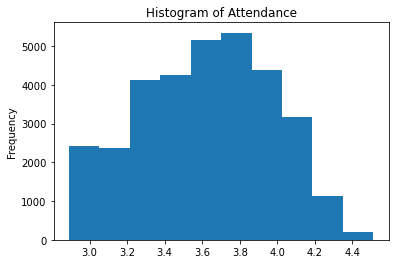

In [10]:
# changing the data distribution
np.log1p(dataset['age']).plot(kind='hist',title = "Histogram of Attendance")

In [11]:
from scipy import stats
stats.boxcox(dataset['age'])[0]

array([5.13067904, 5.61207098, 5.08154692, ..., 5.90975607, 4.09779472,
       5.68998738])

In [12]:
dataset['capital-gain'] = np.log1p(dataset['capital-gain']) # remove the outliers in my data
dataset['capital-loss'] = np.log1p(dataset['capital-loss'])

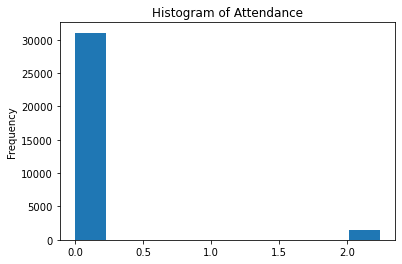

In [13]:
np.log1p(dataset['capital-loss']).plot(kind='hist',title = "Histogram of Attendance")

In [14]:
dataset[(dataset['native-country'] =='?') ]

""" datasetf = drop everything unknown(?)"""
dataset1 = dataset.drop(dataset[(dataset['workclass'] == '?') | (dataset['occupation'] == '?') | (dataset['native-country'] == '?')].index)

""" Dataset 2 Assume ? as Others for workclass and occupation and drop from native country"""
dataset2 = dataset.drop(dataset[dataset['native-country'] =='?'].index)
dataset2['workclass'] = dataset2['workclass'].str.replace('?','Others')
dataset2['occupation'] = dataset2['occupation'].str.replace('?','Others')

""" Dataset 3 Assume ? as Others for workclass and occupation and native country"""
dataset3 = dataset
dataset3['workclass'] = dataset3['workclass'].str.replace('?','Others')
dataset3['occupation'] = dataset3['occupation'].str.replace('?','Others')
dataset3['native-country'] = dataset3['native-country'].str.replace('?','Others')

In [15]:
print(dataset.shape)
print(dataset1.shape)
print(dataset2.shape)
print(dataset3.shape)

(32561, 13)
(32561, 13)
(32561, 13)
(32561, 13)


In [16]:
datasetf = dataset3
duplicateRowsDF = datasetf[datasetf.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
duplicateRowsDF

Duplicate Rows except first occurrence based on all columns are :


,age,workclass,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
352,33,Private,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,40,United-States,>50K
391,27,Private,13,Never-married,Craft-repair,Not-in-family,White,Male,0.0,0.0,50,United-States,<=50K
563,24,Private,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0.0,0.0,40,United-States,<=50K
570,24,Private,9,Never-married,Craft-repair,Own-child,White,Male,0.0,0.0,40,United-States,<=50K
673,33,Private,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32503,47,Private,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40,United-States,<=50K
32512,20,Private,9,Never-married,Machine-op-inspct,Own-child,White,Male,0.0,0.0,40,United-States,<=50K
32527,22,Private,10,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,40,United-States,<=50K
32557,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40,United-States,>50K


In [17]:
datasetf.drop_duplicates(keep=False,inplace=True) 

In [18]:
duplicateRowsDF = datasetf[datasetf.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
duplicateRowsDF

Duplicate Rows except first occurrence based on all columns are :


,age,workclass,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income


In [19]:
print(datasetf.shape)

(27036, 13)


In [20]:
datasetf['native-country'] = datasetf['native-country'].apply(lambda x: regionlist(x))
datasetf['marital-status'] = datasetf['marital-status'].apply(lambda x: maritalstat(x))
datasetf['workclass'] = datasetf['workclass'].apply(lambda x: employementtype(x))

In [21]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, MinMaxScaler
le = LabelEncoder()
lb = LabelBinarizer()
scaler = MinMaxScaler()

In [22]:
datasetf[['workclass', 'marital-status','occupation','relationship','race','gender','native-country']] = datasetf[['workclass', 'marital-status','occupation','relationship','race','gender','native-country']].apply(le.fit_transform)

In [23]:
datasetf['income'] = lb.fit_transform(datasetf['income'])

In [24]:
datasetf[['capital-gain','capital-loss']] = scaler.fit_transform(datasetf[['capital-gain','capital-loss']])

In [25]:
datasetf['age'] = pd.cut(datasetf['age'], [0, 30, 44, 60, float("inf")], labels=False, retbins=True,right=False, duplicates='drop')[0]
datasetf['hours-per-week'] = pd.cut(datasetf['hours-per-week'], [0, 25, 45, float("inf")], labels=False, retbins=True,right=False, duplicates='drop')[0]
#datasetf['capital-gain'] = pd.cut(datasetf['capital-gain'], [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, float("inf")], labels=False, retbins=True,right=False, duplicates='drop')[0]
#datasetf['capital-loss'] = pd.cut(datasetf['capital-loss'], [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, float("inf")], labels=False, retbins=True,right=False, duplicates='drop')[0]

In [26]:
#duplicateRowsDF = datasetf[datasetf.duplicated()]
#print("Duplicate Rows except first occurrence based on all columns are :")
#duplicateRowsDF

In [27]:
#datasetf.drop_duplicates(keep=False,inplace=True) 

In [28]:
datasetf

,age,workclass,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,1,7,13,0,0,1,4,1,0.667492,0.0,1,2,0
1,2,6,13,0,3,0,4,1,0.000000,0.0,0,2,0
2,1,4,9,0,5,1,4,1,0.000000,0.0,1,2,0
3,2,4,7,0,5,0,2,1,0.000000,0.0,1,2,0
4,0,4,13,0,10,5,2,0,0.000000,0.0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,2,4,14,0,3,0,4,1,0.000000,0.0,1,2,1
32555,0,4,10,0,11,1,4,1,0.000000,0.0,1,2,0
32556,0,4,12,0,13,5,4,0,0.000000,0.0,1,2,0
32558,2,4,9,0,0,4,4,0,0.000000,0.0,1,2,0


In [ ]:
from pandas_profiling import ProfileReport
prof = ProfileReport(dataset)
prof.to_file(output_file='profile.html')

In [44]:
import seaborn as sns

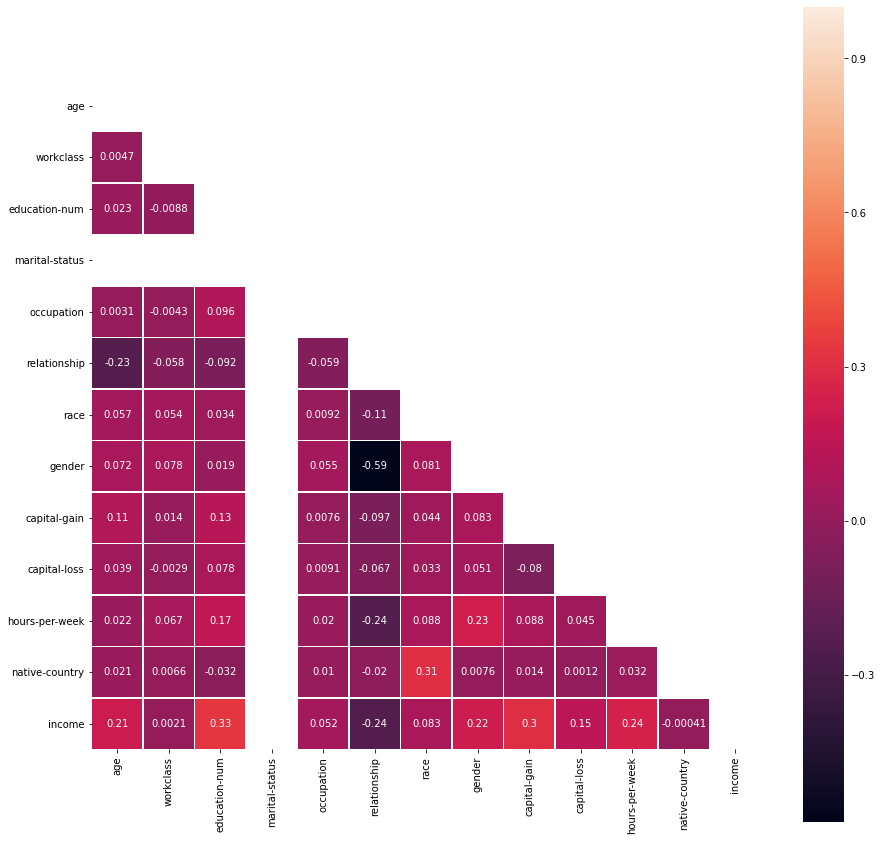

In [45]:
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(datasetf.corr(),annot=True, fmt='.2g', mask = np.triu(datasetf.corr()),square=True,linewidths=.5)

In [46]:
Y = datasetf.iloc[:,-1].values
X = datasetf.iloc[:, 0:len(datasetf.columns)-1].values

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2, random_state=42)

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100,criterion='gini',max_features = 'auto',bootstrap = True,random_state =1)

In [33]:
model_train = rf.fit(x_train,y_train)

In [34]:
y_pred = rf.predict(x_test)

In [35]:
from sklearn.metrics import accuracy_score,auc,confusion_matrix,roc_curve
cm = confusion_matrix(y_test,y_pred)
Accuracy = accuracy_score(y_test,y_pred)
print(Accuracy)

0.8475250064119005


In [36]:
# Cross validate the score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=5, random_state=7)
result  = cross_val_score(rf, x_train, y_train, cv=kfold, scoring='accuracy')
print(result.mean())

C:\Users\Administrator\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.8447629867682223


In [69]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


criterion = ['gini','entropy']
max_features = ['sqrt','auto','log2']
n_estimators = [10,50,100,150,200,250,300,350,400,450,500]

param_grid = dict(n_estimators=n_estimators,
                  criterion=criterion,
                  max_features=max_features)

grid = GridSearchCV(estimator=rf,
                    param_grid=param_grid,
                    scoring='accuracy',
                    cv =5,
                    verbose=1,
                    n_jobs=-1)
grid_result = grid.fit(x_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 66 candidates, totalling 330 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 330 out of 330 | elapsed: 12.7min finished


Best Score:  0.845981300285039
Best Params:  {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 450}


In [70]:
re = grid_result.cv_results_

In [71]:
re['params']

[{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 10},
 {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 50},
 {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 100},
 {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 150},
 {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 200},
 {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 250},
 {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 300},
 {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 350},
 {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 400},
 {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 450},
 {'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 500},
 {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 10},
 {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 50},
 {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 100},
 {'criterion': 'gini', 'max_features':

In [72]:
re['mean_test_score']

array([0.84181333, 0.84360883, 0.84492334, 0.84530808, 0.84524395,
       0.84530804, 0.84566069, 0.84553242, 0.84575685, 0.8459813 ,
       0.84569275, 0.84181333, 0.84360883, 0.84492334, 0.84530808,
       0.84524395, 0.84530804, 0.84566069, 0.84553242, 0.84575685,
       0.8459813 , 0.84569275, 0.84181333, 0.84360883, 0.84492334,
       0.84530808, 0.84524395, 0.84530804, 0.84566069, 0.84553242,
       0.84575685, 0.8459813 , 0.84569275, 0.84085155, 0.84360882,
       0.84431419, 0.84482715, 0.84540423, 0.84489126, 0.84469887,
       0.84524388, 0.84530801, 0.84550038, 0.8454042 , 0.84085155,
       0.84360882, 0.84431419, 0.84482715, 0.84540423, 0.84489126,
       0.84469887, 0.84524388, 0.84530801, 0.84550038, 0.8454042 ,
       0.84085155, 0.84360882, 0.84431419, 0.84482715, 0.84540423,
       0.84489126, 0.84469887, 0.84524388, 0.84530801, 0.84550038,
       0.8454042 ])

In [73]:
hi_rf =[]
for i in range(len(re['params'])):
    t = re['params'][i]
    t['mean_acc'] = re['mean_test_score'][i]
    hi_rf.append(t)

In [74]:
import hiplot as hip
hip.Experiment.from_iterable(hi_rf).display()

<IPython.core.display.Javascript object>

In [75]:
re['mean_test_score']

array([0.84181333, 0.84360883, 0.84492334, 0.84530808, 0.84524395,
       0.84530804, 0.84566069, 0.84553242, 0.84575685, 0.8459813 ,
       0.84569275, 0.84181333, 0.84360883, 0.84492334, 0.84530808,
       0.84524395, 0.84530804, 0.84566069, 0.84553242, 0.84575685,
       0.8459813 , 0.84569275, 0.84181333, 0.84360883, 0.84492334,
       0.84530808, 0.84524395, 0.84530804, 0.84566069, 0.84553242,
       0.84575685, 0.8459813 , 0.84569275, 0.84085155, 0.84360882,
       0.84431419, 0.84482715, 0.84540423, 0.84489126, 0.84469887,
       0.84524388, 0.84530801, 0.84550038, 0.8454042 , 0.84085155,
       0.84360882, 0.84431419, 0.84482715, 0.84540423, 0.84489126,
       0.84469887, 0.84524388, 0.84530801, 0.84550038, 0.8454042 ,
       0.84085155, 0.84360882, 0.84431419, 0.84482715, 0.84540423,
       0.84489126, 0.84469887, 0.84524388, 0.84530801, 0.84550038,
       0.8454042 ])

In [76]:
re['std_test_score'] 

array([0.00049352, 0.00248488, 0.00329111, 0.00329894, 0.0030964 ,
       0.00250378, 0.00194418, 0.00210932, 0.00184015, 0.00223907,
       0.00175619, 0.00049352, 0.00248488, 0.00329111, 0.00329894,
       0.0030964 , 0.00250378, 0.00194418, 0.00210932, 0.00184015,
       0.00223907, 0.00175619, 0.00049352, 0.00248488, 0.00329111,
       0.00329894, 0.0030964 , 0.00250378, 0.00194418, 0.00210932,
       0.00184015, 0.00223907, 0.00175619, 0.00057119, 0.00233632,
       0.00293403, 0.00266585, 0.0025793 , 0.00211756, 0.00179949,
       0.0014295 , 0.00184963, 0.00147283, 0.00144924, 0.00057119,
       0.00233632, 0.00293403, 0.00266585, 0.0025793 , 0.00211756,
       0.00179949, 0.0014295 , 0.00184963, 0.00147283, 0.00144924,
       0.00057119, 0.00233632, 0.00293403, 0.00266585, 0.0025793 ,
       0.00211756, 0.00179949, 0.0014295 , 0.00184963, 0.00147283,
       0.00144924])

In [77]:
re['rank_test_score']

array([61, 55, 40, 25, 34, 28, 10, 13,  4,  1,  7, 61, 55, 40, 25, 34, 28,
       10, 13,  4,  1,  7, 61, 55, 40, 25, 34, 28, 10, 13,  4,  1,  7, 64,
       58, 52, 46, 19, 43, 49, 37, 31, 16, 22, 64, 58, 52, 46, 19, 43, 49,
       37, 31, 16, 22, 64, 58, 52, 46, 19, 43, 49, 37, 31, 16, 22])

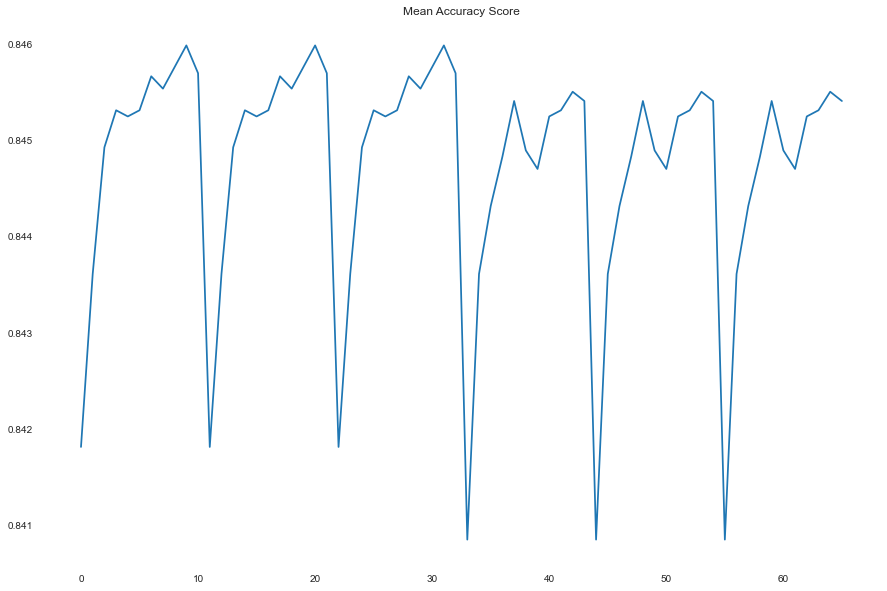

In [78]:
f, ax = plt.subplots(figsize=(15,10))
plt.plot(re['mean_test_score'])
plt.title("Mean Accuracy Score")
# get the current axes
ax.relim()      # make sure all the data fits
ax.autoscale()

# Neural Network

In [66]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import utils

In [67]:
# Creating a model
model = Sequential()
model.add(Dense(7, input_shape = x_train.shape[1:], activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#compiling a model
model.compile(optimizer = 'adam',
                 loss = 'binary_crossentropy',
                 metrics = ['accuracy'])

In [68]:
y_train.shape

(21628,)

In [69]:
X_train = utils.normalize(x_train,axis=1).reshape(x_train.shape[0],-1)
X_test = utils.normalize(x_test,axis=1).reshape(x_test.shape[0],-1)

In [70]:
# Training a model
history = model.fit(X_train,y_train, epochs = 100, batch_size = 10, validation_split=0.2) #, validation_split=0.2

Train on 17302 samples, validate on 4326 samples
Epoch 1/100
17302/17302 [==============================] - 2s 130us/step - loss: 0.5176 - accuracy: 0.7560 - val_loss: 0.4789 - val_accuracy: 0.7781
Epoch 2/100
17302/17302 [==============================] - 2s 136us/step - loss: 0.4535 - accuracy: 0.7948 - val_loss: 0.4550 - val_accuracy: 0.7839
Epoch 3/100
17302/17302 [==============================] - 2s 121us/step - loss: 0.4354 - accuracy: 0.8057 - val_loss: 0.4427 - val_accuracy: 0.7924
Epoch 4/100
17302/17302 [==============================] - 2s 123us/step - loss: 0.4260 - accuracy: 0.8076 - val_loss: 0.4307 - val_accuracy: 0.8028
Epoch 5/100
17302/17302 [==============================] - 2s 122us/step - loss: 0.4194 - accuracy: 0.8094 - val_loss: 0.4235 - val_accuracy: 0.8047
Epoch 6/100
17302/17302 [==============================] - 3s 164us/step - loss: 0.4128 - accuracy: 0.8123 - val_loss: 0.4172 - val_accuracy: 0.8072
Epoch 7/100
17302/17302 [==============================] 

In [71]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [72]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

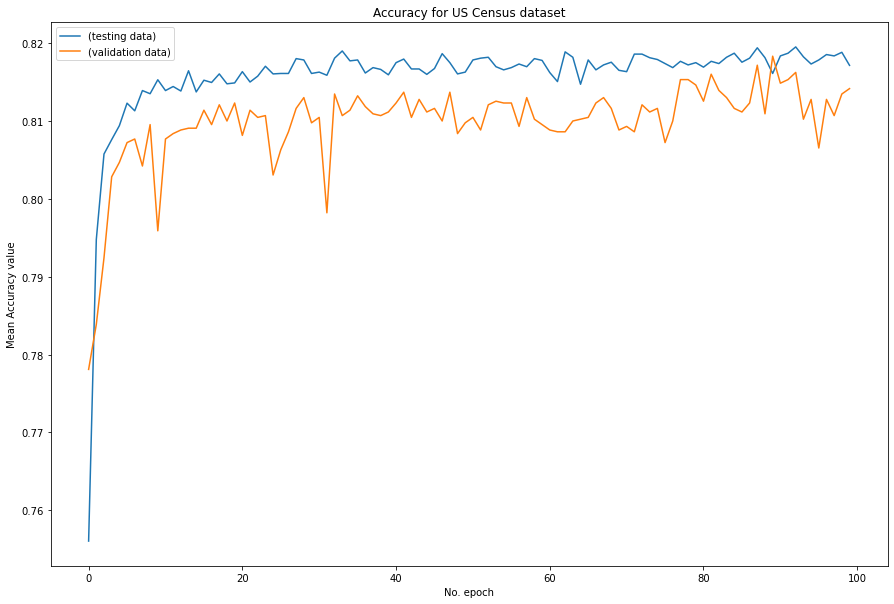

In [73]:
# Plot history: MAE
f, ax = plt.subplots(figsize=(15,10))
plt.plot(history.history['accuracy'], label='(testing data)')
plt.plot(history.history['val_accuracy'], label='(validation data)')
plt.title('Accuracy for US Census dataset')
plt.ylabel('Mean Accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

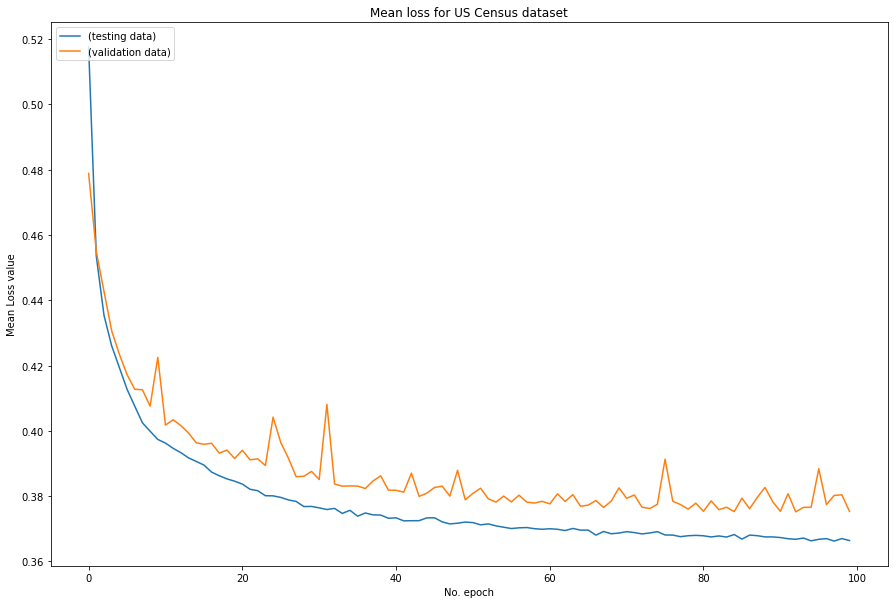

In [74]:
# Plot history: MAE
f, ax = plt.subplots(figsize=(15,10))
plt.plot(history.history['loss'], label='(testing data)')
plt.plot(history.history['val_loss'], label='(validation data)')
plt.title('Mean loss for US Census dataset')
plt.ylabel('Mean Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [75]:
val_loss, val_acc = model.evaluate(X_test,y_test)
print(val_loss)
print(val_acc)

5408/5408 [==============================] - 0s 21us/step
0.3686124583673195
0.8193417191505432


In [76]:
#Hyperparameter Tuning
from keras.wrappers.scikit_learn import KerasClassifier
import os

In [80]:
def model_tuning(optimizer, activation, loss):
    model1 = Sequential()
    model1.add(Dense(12, input_shape = x_train.shape[1:], activation=activation))
    model1.add(Dense(128, activation=activation))
    model1.add(Dense(128, activation=activation))
    model1.add(Dense(1,activation='sigmoid'))

    #compiling a model
    model1.compile(optimizer = optimizer, loss = loss, metrics = ['accuracy'])
    return model1
    

In [81]:
seed = 7
np.random.seed(seed)
# Define the model
model_hyp = KerasClassifier(build_fn=model_tuning, verbose=0)

In [82]:
optimizer = ['SGD', 'Adam' ,'Adadelta','Adagrad','RMSprop','Adamax','Nadam']
epochs = [30, 50, 100]
batch_size = [16, 32]
activation = ['relu',  'sigmoid']
loss = [ 'binary_crossentropy'] #'sparse_categorical_crossentropy',
param_grid = dict(optimizer=optimizer, epochs=epochs, batch_size=batch_size, activation=activation, loss=loss)
grid_nn = GridSearchCV(estimator=model_hyp, param_grid=param_grid, cv=3, n_jobs=1, refit=True, verbose=2)
grid_nn_result = grid_nn.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] activation=relu, batch_size=16, epochs=30, loss=binary_crossentropy, optimizer=SGD 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  activation=relu, batch_size=16, epochs=30, loss=binary_crossentropy, optimizer=SGD, total=  28.8s
[CV] activation=relu, batch_size=16, epochs=30, loss=binary_crossentropy, optimizer=SGD 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   28.7s remaining:    0.0s


[CV]  activation=relu, batch_size=16, epochs=30, loss=binary_crossentropy, optimizer=SGD, total=  27.5s
[CV] activation=relu, batch_size=16, epochs=30, loss=binary_crossentropy, optimizer=SGD 
[CV]  activation=relu, batch_size=16, epochs=30, loss=binary_crossentropy, optimizer=SGD, total=  31.6s
[CV] activation=relu, batch_size=16, epochs=30, loss=binary_crossentropy, optimizer=Adam 
[CV]  activation=relu, batch_size=16, epochs=30, loss=binary_crossentropy, optimizer=Adam, total=  32.9s
[CV] activation=relu, batch_size=16, epochs=30, loss=binary_crossentropy, optimizer=Adam 
[CV]  activation=relu, batch_size=16, epochs=30, loss=binary_crossentropy, optimizer=Adam, total=  30.7s
[CV] activation=relu, batch_size=16, epochs=30, loss=binary_crossentropy, optimizer=Adam 
[CV]  activation=relu, batch_size=16, epochs=30, loss=binary_crossentropy, optimizer=Adam, total=  36.9s
[CV] activation=relu, batch_size=16, epochs=50, loss=binary_crossentropy, optimizer=SGD 
[CV]  activation=relu, batch_

[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed: 28.5min finished


In [83]:
print("Best: %f using %s" % (grid_nn_result.best_score_, grid_nn_result.best_params_))

means = grid_nn_result.cv_results_['mean_test_score']
stds = grid_nn_result.cv_results_['std_test_score']
params = grid_nn_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.830451 using {'activation': 'relu', 'batch_size': 16, 'epochs': 50, 'loss': 'binary_crossentropy', 'optimizer': 'Adam'}
0.804328 (0.005397) with: {'activation': 'relu', 'batch_size': 16, 'epochs': 30, 'loss': 'binary_crossentropy', 'optimizer': 'SGD'}
0.825365 (0.002726) with: {'activation': 'relu', 'batch_size': 16, 'epochs': 30, 'loss': 'binary_crossentropy', 'optimizer': 'Adam'}
0.791289 (0.010355) with: {'activation': 'relu', 'batch_size': 16, 'epochs': 50, 'loss': 'binary_crossentropy', 'optimizer': 'SGD'}
0.830451 (0.002069) with: {'activation': 'relu', 'batch_size': 16, 'epochs': 50, 'loss': 'binary_crossentropy', 'optimizer': 'Adam'}
0.802802 (0.006088) with: {'activation': 'relu', 'batch_size': 32, 'epochs': 30, 'loss': 'binary_crossentropy', 'optimizer': 'SGD'}
0.828001 (0.001407) with: {'activation': 'relu', 'batch_size': 32, 'epochs': 30, 'loss': 'binary_crossentropy', 'optimizer': 'Adam'}
0.802941 (0.000284) with: {'activation': 'relu', 'batch_size': 32, 'epochs': 

In [57]:
res = grid_nn_result.cv_results_

In [62]:
import hiplot as hip

In [60]:
hi_n =[]
for i in range(len(res['params'])):
    t = res['params'][i]
    t['mean_acc'] = res['mean_test_score'][i]
    hi_n.append(t)

In [63]:
#import hiplot as hip
hip.Experiment.from_iterable(hi_n).display()

<IPython.core.display.Javascript object>